## Fronteras de decision (decision boundaries).
Recuerden la hipotesis

$$ h(\theta, x^{(i)}) = S(x^{(i)} \theta) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta}} $$
$x^{(i)}$ es una muesta de los datos (entrada). De alguna forma esta hipotesis nos relaciona con la probabilidad $p(y=1  | x^{(i)}, \theta)$. 
Nosotros definimos un umbral $\gamma=0.5$. Basado en este umbral podemos definir una hiptesis binaria (dos clases solamente).

\begin{eqnarray}
h_{binaria} = \left \{
    \begin{array}{cc}
    1 & \text{  si  } S(x^{(i)}) > \gamma \\
    0 &  \text{de lo contrario}
    \end{array}
    \right . 
\end{eqnarray}

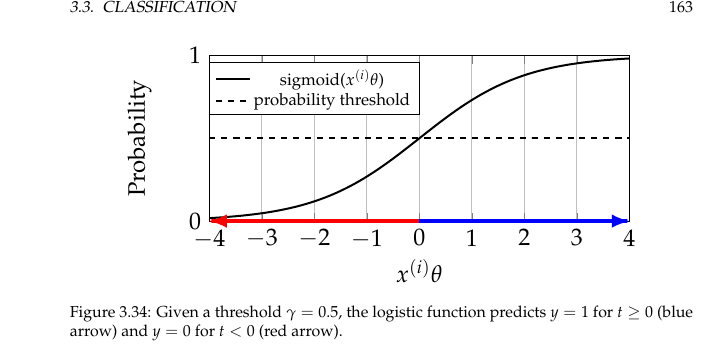

El punto "de quiebre" esta en $x^{(i)} \theta = 0$. Si esta estamos en
una dimension esto es el punto $x^{(i)}=0$ pero en general estamos en varias dimensiones. Entonces esto produce una curva en 2D o una superficie en 3D, etc.  La frontera de decision es entonces para este caso: un punto (en 1D), 
una linea recta en 2D, un plano en 3D y un hiperplano en mas de tres dimensiones. En 2D, por ejemplo tenemos $x_1, x_2$. $x_1$ en abscisas y $x_2$ 3n las ordenadas. 



Como resolvermos nostros los problemas de optimizacion con gradiente.
Pregunta: por que con gradiente y no con las ecuaciones normales.
Las ecuaciones normales salen de $A x= b$ que es un problema lineal.
La regresion logistica no es lineal. Entones debemos usar otros metodos.
El gradiente es el mas efectivo para ML en lo que estamos viendo.

Para el metodo del gradiente se necesitan dos cosas **siempre**

1. La funcion de costo $J(\theta)$
2. El  gradiente de la funcion de costo $\theta$.

Como se halla la frontera de decision?

1. Mediante el metodo del gradiente (paso anterior) hallar el $\theta$ optimo. A esto se llama entrenamiento y aprendizaje.
2. Graficar $h(\theta, x) = \gamma$. 

Em el caso lineal $S(\theta)=1/2$, $x^{(i)} \theta = 0$ y esto es un hiperplano en las variables $x^{(i)} \in \mathbb{R}^n$. 



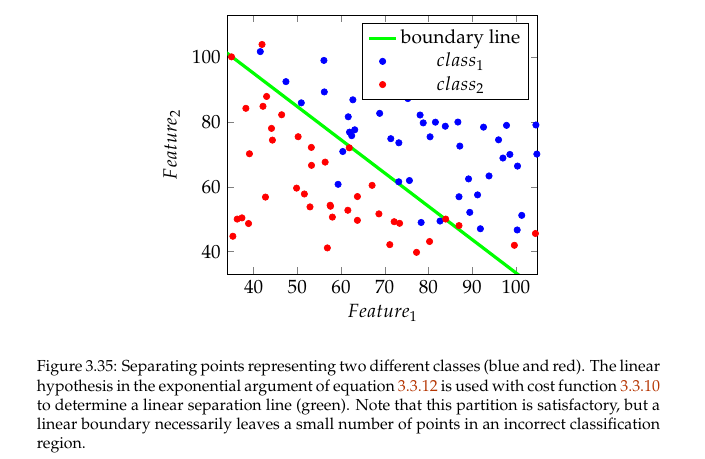

Cuando los puntos se pueden separar en dos grupos (de etiquetas distintas) mediante una linea (hiperplano) recta se dice que el problema es **linealmente separable**. 

Sin embargo hay datos que **no son linealmente separables**. Que hacemos ahi?

Tenemos que mapear el argumento de la hipotesis a una funcion no lineal.

Recuerden:

$$h(\theta, x^{(i)}) = S (\theta^T x^{(i)})  $$
para la frontera de desicion no lineal se necesita un argumento no lineal, es decir

$$h(\theta, x^{(i)}) = S ( g(\theta, X)) $$ donde $g(\theta, X)$ no es 
lineal en $X$. 

Cuando se grafica la frontera de decision $\theta$ es constante (es el $\theta$ optimo) pero $X$ es variable. Los ejes de la grafica con los "features" (atributos).

Por ejemplo. Los datos de la grafica de abajo, indican que el separador no es lineal. Este se asume polinomico en dos variables $(x_1, x_2)$. En este caso se escoge un polinomio de orden 6 en dos variables.

$$ g(\theta, X) = \sum_{i=0}^8 \sum_{j=0}^i \theta_{[i(i+1)/2 + j]} x_2^i x_1^{j-i}  $$
si expande $g$ le da

$$ \theta_0 + \theta_1 x_2 + \theta_2 x_1 + \theta_3 x_1 x_2 + \cdots +  $$

cuantos terminos tiene ese polinomio? en la proxima clase


$$ \binom{6+2}{2} =\binom{8}{2} = \frac{8 \times 7 \times 6 \times 5 \times 4 \times 3 \times 2}{2}  $$



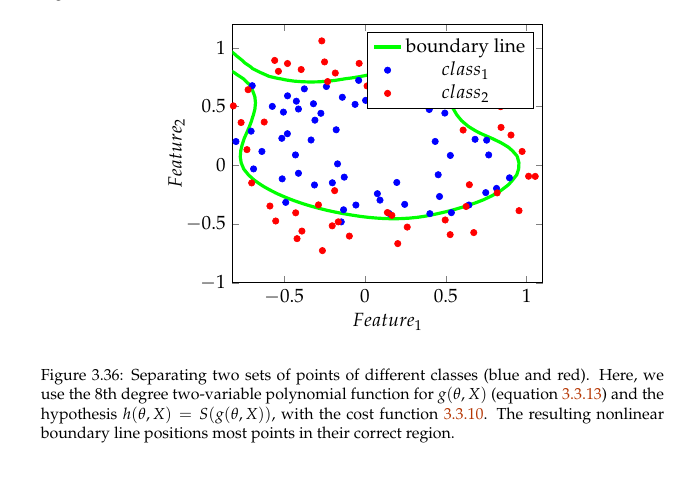

La curva de arriba resulta de graficare $g_{\theta}(x_1, x_2)=0$, para $\theta$ optimo,

Si hay sobreajuste se puede regularizar.

Recuerden regresion logistica con regularizacion:


$$ J(\theta) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)})]] + (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]  + \frac{\lambda}{2m} \| \theta \|^2 $$

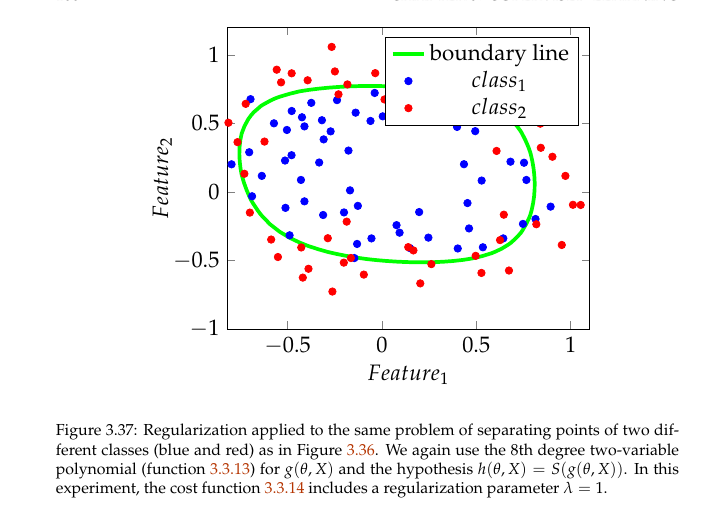

la grafica verde es una funcion implicita $g(x_1, x_2)=0$. Se puede puede hacer como el contorno 0 de la superficie
$z = g(x_1, x_2)$. 

## Analisis de que tan precisa es la clasificacion. QC: Quality Control

La idea es, ya hemos creado "muchos" modelos de ML para regresion lineal y logistica. La pregunta es, que tan buenos son esos modelos, y como los verificamos? 

Para la clasificacion (logistica) vamos a definir una matriz que se llama **matriz de confusion** (confusion matrix) 

Empecemos con un ejemplo. 1494 chicas se someteten a una prueba de embarazo. Algunas salen positivo y otras negativo, la pregunta
cuales de las positivo son realmente positivas y cuales de las negativas son realmente negativas. 

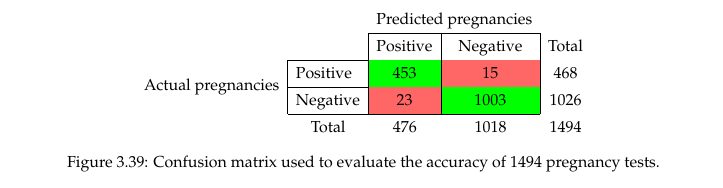

A esta tabla se le llama **matriz de confusion** .
En esta matriz de confusion: $L$  existen 4 entradas (componentes)
El segundo indice (las columnas) indican la prediccion. 

* $\ell_{11}$ : Se conoce como TP: True Positive (verdaderos positivos).
* $\ell_{12}$. FN: se predigo negativa pero es positiva, falso negativo

*  $\ell_{21}$ : FP: Falso positivo 
* $\ell_{22}$ : TN: verdadero negativo. 

La segunda palabra y el segundo indice que son la columna son las predicciones. 



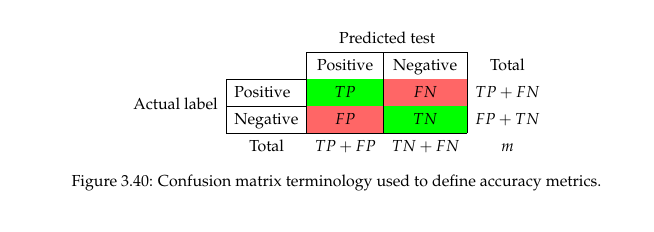

# 7:45
## Metricas de clasificacion

En espanol accuracy y precision son iguales, pero como distinguimos la una de la otra?

accuraccy = exactitud
precision = precision

Los elementos de la diagonal (los verdes) son los "buenos", son los aciertos, los fuera de la diagonal (los rojos) son desacierdos. El "accuracy"  es la proporcion de los aciertos sobre el total. 

El total : $TP + TN + FP + FN = m$, entonces

$$ \text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
= \frac{TP + TN}{m}   $$
el complemento de este (es decir $1-$accuracy=miscalsification rate).

$$ \text{misclassification rate} = \frac{FP + FN}{m} $$.

Ejemplo en Python de la matriz de confusion

In [1]:
from sklearn.metrics import confusion_matrix

y_true=[1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
y_pred=[0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

# ver documento de "confusion_matrix"
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"tn={tn}, fp={fp}, fn={fn}, tp={tp}")

tn=3, fp=3, fn=2, tp=4


### Tres ejemplos importantes

* Un instituto de investigacion de diabetes estudia $m$ pacientes. Aquellos que diagnostican como positivos "+" con la enfermedad, aquellos que diagnostican como "-" o sea sanos.
Podemos observar 4 combinaciones:

    * TP: True positive. Se diagnostican como diabeticos y lo son. Esto es bueno aunque no son buenas noticias para el paciente. 
    * TN: Se predice que el paciente es sano y es sano. :)  Muy buenas noticias. 
    * FP: Se predice que el paciente tiene diabetes pero no tiene. El se limita de comer azucar sin necesitad y se limita de muchas otras cosas. Puede tomar medicinas que no necesite y generar hopogimedia. 
    * FN: Es decir que essta aliviado cuando en verdad no es asi. El paciente sale come dulce como  quiere y se enferma o puede morir. Piense si en vez de diabetes es cancer. Se va tranquilo a casa y a los meses "metastasis".
De estas cuatro la peor la ultima FN.

* Asuma un modelo de ML para detectar spam email. Tenemos cuatro casos.
    * TP: El correo se predice como spam y es spam
    * TN: El correo se predice como bueno y es bueno
    * FP: El correo se predice como  spam pero no lo es. Problema, el correo se mueve a la basura siendo un correo bueno. Usted no lo ve y lo ignora. El correo era de un cliente super-exclusivo para la compania. El cliente, al no recibir respuesta se va para la competencia. Usted pierde el trabajo :(
    * FN : Se predice como bueno y es spam. Te llega a la bandeja de entrada y simplemente lo borras, y lo marcas como spam para la proxima vez no lo olvide (aprenda).

* Considere el siguiente ejemplo con una sola muestra $m=1$. Usted recibe un email diciendo que se gano un millon de dolares y que para poderlos consignar necesita mandar sus datos bancarios.
Usted que haria?

Hay cuatro posibilidades.

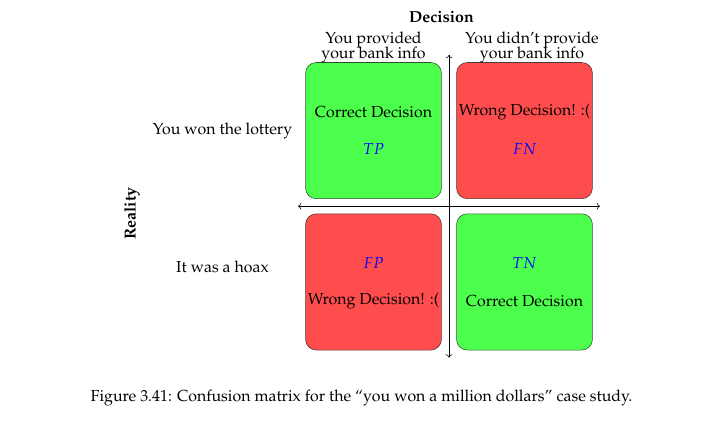

### Continuacion con metricas de clasificacion
Regresemos con el accuracy. Recuerde que el accuracy es la diagonal sobre el total. Veamos un ejemplo.

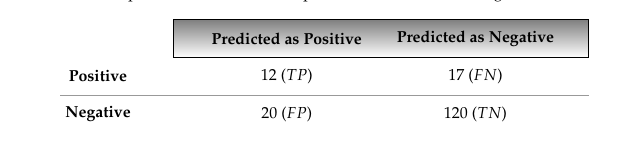

En la tabla anterior pensemos que estos son emails.
El accuracy esta dado por:
$m=169$, 
$$ \text{accuracy} = \frac{12 + 120}{169} = 0.781  \quad , \quad (78.1 \% )$$

Por que la metrica de exactitud (accuracy) no es la mejor.
Veamos. El servidor de email predice que todos los emails son spam
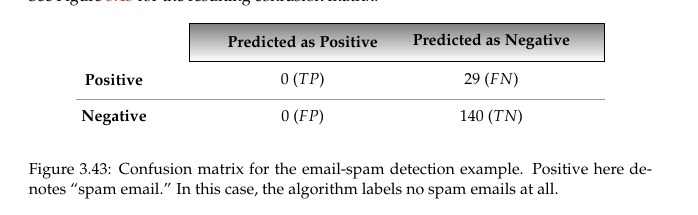


En este caso el accuracy es:

$$\text{accuracy} = \frac{140+0}{140+29}  = 0.828  \quad , \quad (82.8 \%) 
 $$

 :( !!!

#### Precision: que procentaje de positivos son aciertos en la prediccion.

$$ \text{precision}:  \frac{TP}{TP + FP} $$.
En nuestra notacion de matriz de confusion, es la suma de la primera columna sobre el $TP$.

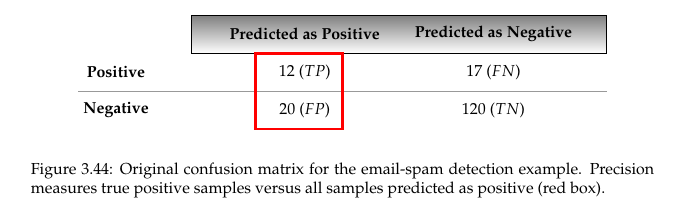



En el ejemplo (ultima tabla) la precision es:

$$ \text{precision}:  \frac{12}{12+20} = \frac{12}{32} = 37.5 \quad, \quad  $$.

Volvamos al ejemplo de que todos son spam. 

En este caso

$$ \text{precision}= \frac{0}{0+ \epsilon}  = 0 $$

### Recall (cobertura): Es el radio de los positivos predichos contro todos los positivos.

$$ \text{recall}= \frac{TP}{TP + FN}$$.
Es el TP sobre la suma de la primera fila.

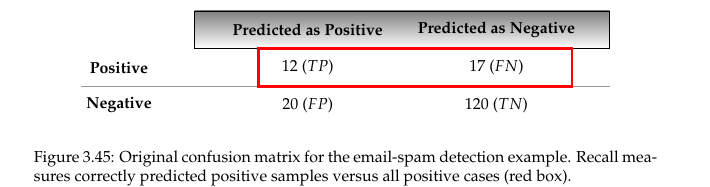

En el ejemplo, tenemos que

$$\text{recall} = \frac{12}{12+17} = 0.4137 \quad , \quad (41.4 \%) $$

Si los "F" (FP, FN) son 0, es decir $FP=FN=0$ entonces todas estas medidas dan 1 (el 100%). Excepto posiblemente por la precision.

El FN es lo peor para un diabetico (o paciente de cancer), sin embargo para el spam email o el problema de banco, lo peor es FP.

Precision y recall (cobertura) son de cierta forma complementarios. El uno (precision) tiene como denominador TP+FP
mientras que recall el denominador es TP + FN.

Entonces el unos es funcion de FP y el otro de FN. 

En el caso bancario queremos pocos FP y un racall alto, en el caso del paciente medico queremos pocos FN y una precision alta.

Como estas dos medidas (precision y recall) compiten entre si por los FN, FP, se define una mueva medida llamada F1 score.
Esta medida es el promedio armonico de precision y recall.

$$ \text{F1 score}: \left ( \frac{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}{2}  \right )^{-1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}} $$



### La curva ROC y su area AUC
ROC: Receiver Operating Characteristic, AUC: Area under the curve.

La ROC es una curva que se invento en la seguna guerra mundial en USA para QC de clasificaciones.

La curva esta parametrizada por el umbaral $\gamma$. Lo que
hacemos es evaluar la hipotesis para varios de $\gamma$ y con 
esta hipotesis calcular los TP, TN, FP, FN y con ellos dos valores:

$$ TPR = \text{recall} = sensitivy = \frac{TP}{TP + FN} $$
en romano, perdon.

$$ FPR = \frac{FP}{FP + TN} $$ 

En la curva de ROC se grafica en el eje FPR y  en el  eje "y" el TPR como funcion de $\gamma$. 

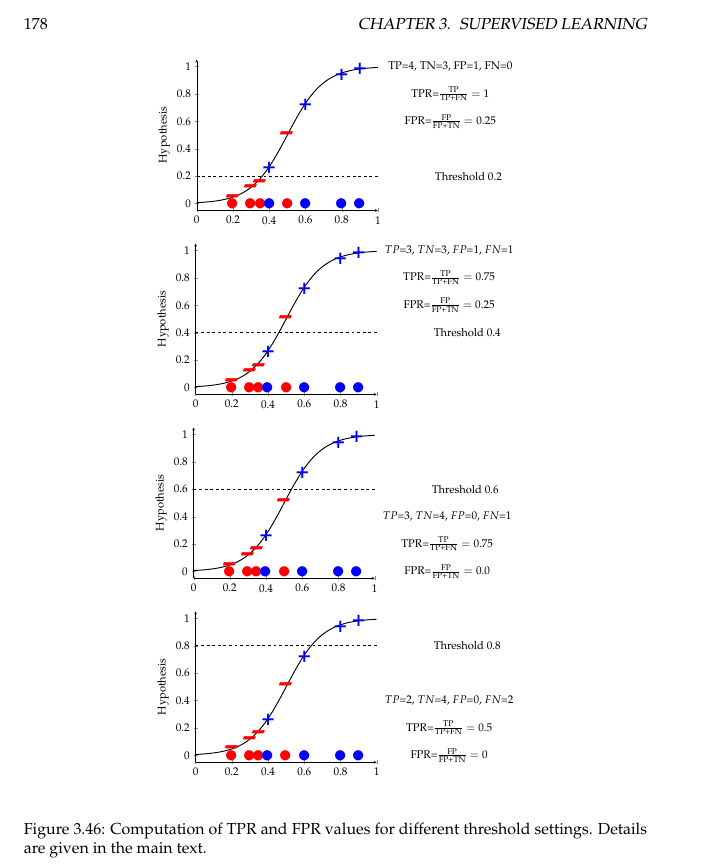

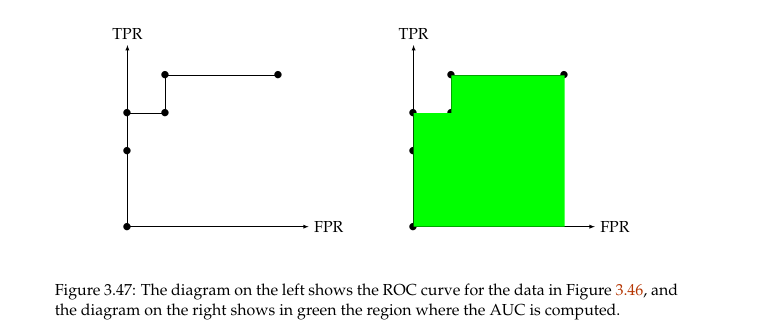

Proxima clase:
* Matriz de confusion $K>2$
* Redes Neuronales.